# Phi
- about | [microsoft-phi2](https://www.microsoft.com/en-us/research/blog/phi-2-the-surprising-power-of-small-language-models/)

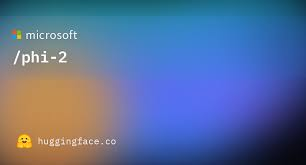
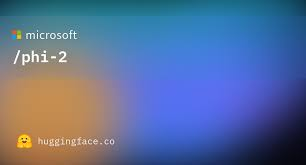

## install

In [1]:
!pip install transformers sentencepiece accelerate bitsandbytes einops -qq

## setting

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

### 1. load

In [3]:
model = AutoModelForCausalLM.from_pretrained('microsoft/phi-2', torch_dtype='auto', device_map='auto', trust_remote_code=True)

config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

configuration_phi.py:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- configuration_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi.py:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- modeling_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [4]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/phi-2', trust_remote_code=True)

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### 2. prompt

In [5]:
prompt = '''Give me a list of 5 words that starts with letter "C"'''

### 3. generate

In [10]:
with torch.no_grad():
    token_ids = tokenizer.encode(prompt, add_special_tokens=True ,return_tensors='pt')
    output_ids = model.generate(
        token_ids.to(model.device),
        max_new_tokens=512,
        do_sample=True,
        temperature=0.3,
    )

output = tokenizer.decode(output_ids[0][token_ids.size(1) :])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [12]:
end_index = output.find('<|endoftext|>')
answer = output[:end_index].strip()

print(answer)

## INPUT

##OUTPUT
1. Cat
2. Car
3. Candle
4. Cookie
5. Cloud
